## Notebook requirements
* matplotlib
* numpy
* xarray
* geopandas
* basemap
* cartopy
* shapely
* metpy
* Lake shapefile from https://gis.utah.gov/data/water/lakes-rivers-dams/#NHDLakes

# Switching from Basemap to Cartopy: Common Idioms Translated

## Why Switch?
![eol announcement](basemap_eol.png)

### More reasons
* Better integration with matplotlib
* Don't need the `basemap-data-hires` package anymore
* Don't have to deal with the conda-forge Basemap bug where it can't link in Proj correctly
* More explicit interface (remember: explicit is better than implicit!)

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
import xarray as xr

# Take a look at the dataset
data = xr.open_dataset("sst.mon.anom.mini.nc")
data

<xarray.Dataset>
Dimensions:  (lat: 36, lon: 72, time: 2)
Coordinates:
  * lat      (lat) float32 -87.5 -82.5 -77.5 -72.5 -67.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 2.5 7.5 12.5 17.5 22.5 ... 342.5 347.5 352.5 357.5
  * time     (time) datetime64[ns] 1856-01-01 2018-08-01
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    title:          Kaplan Extended SST V2
    platform:       Analysis
    Conventions:    COARDS
    history:        Originally converted from the IRI format to netCDF3 10/20...
    dataset_title:  Kaplan Extended V2 SST anomaly data
    References:     https://www.esrl.noaa.gov/psd/data/gridded/data.kaplan_ss...
    description:    Data is processed at Lamont-Doherty using an \noptimal an...

<IPython.core.display.Javascript object>


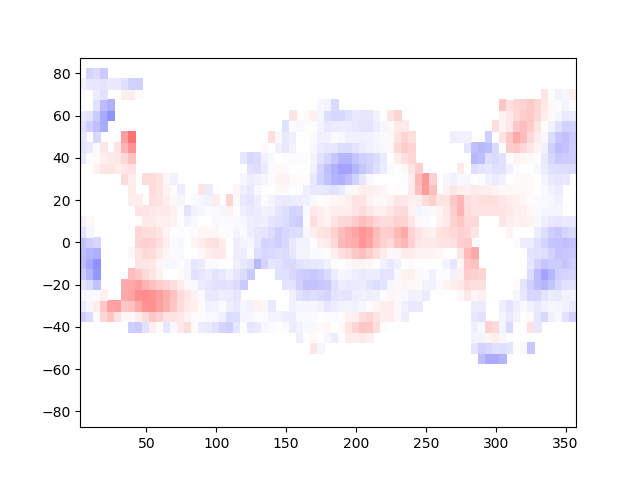

In [2]:
# Plot what the data looks like unprojected onto anything
lons, lats = np.meshgrid(data.lon.values, data.lat.values)
sst = data.sst
vext = np.max(np.abs(sst))
ax0 = plt.axes()
ax0.pcolormesh(lons, lats, sst.isel(time=0), vmin=-vext, vmax=vext, cmap='bwr')

First example: a single plot

<IPython.core.display.Javascript object>


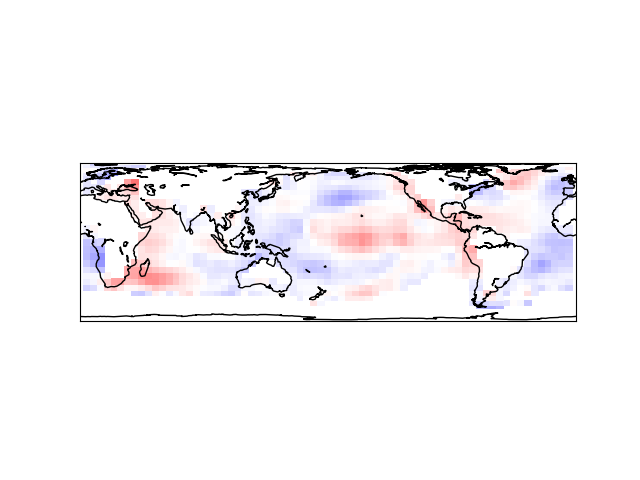

In [3]:
%matplotlib notebook
import geopandas as gpd    # Addressing the Basemap bug (thanks Taylor for this idea!)
from mpl_toolkits.basemap import Basemap
map0 = Basemap(projection='cea', lon_0=180)
ax1 = plt.axes()
map0.drawcoastlines(ax=ax1)
map0.pcolormesh(lons, lats, sst.isel(time=0), vmin=-vext, vmax=vext, cmap='bwr', ax=ax1, latlon=True)

<IPython.core.display.Javascript object>


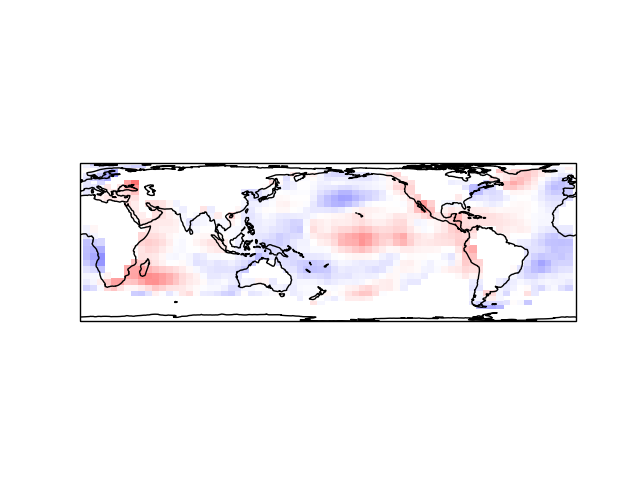

In [4]:
%matplotlib notebook
import cartopy.crs as ccrs
plot_proj = ccrs.LambertCylindrical(central_longitude=180)
data_proj = ccrs.PlateCarree()    # Use Geodetic() in most cases, but it doesn't work for pcolormesh
ax2 = plt.axes(projection=plot_proj)
ax2.coastlines()
ax2.pcolormesh(lons, lats, sst.isel(time=0), vmin=-vext, vmax=vext, cmap='bwr', transform=data_proj)

Second example: subplots

<IPython.core.display.Javascript object>


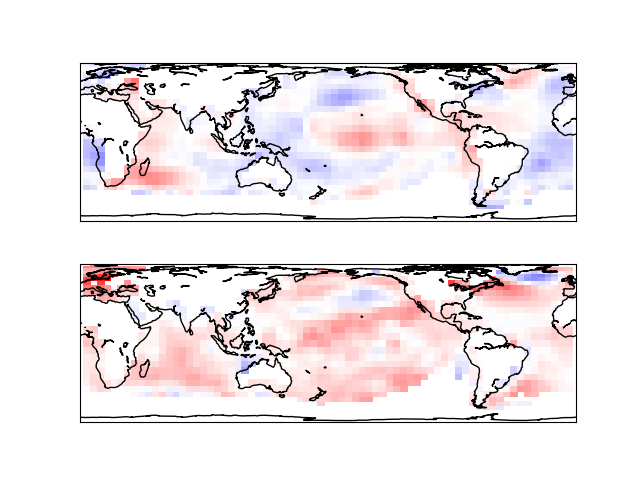

In [5]:
%matplotlib notebook
map0 = Basemap(projection='cea', lon_0=180)
fig, (ax3, ax4) = plt.subplots(nrows=2)
map0.drawcoastlines(ax=ax3)
map0.drawcoastlines(ax=ax4)
map0.pcolormesh(lons, lats, sst.isel(time=0), vmin=-vext, vmax=vext, cmap='bwr', ax=ax3, latlon=True)
map0.pcolormesh(lons, lats, sst.isel(time=-1), vmin=-vext, vmax=vext, cmap='bwr', ax=ax4, latlon=True)

<IPython.core.display.Javascript object>


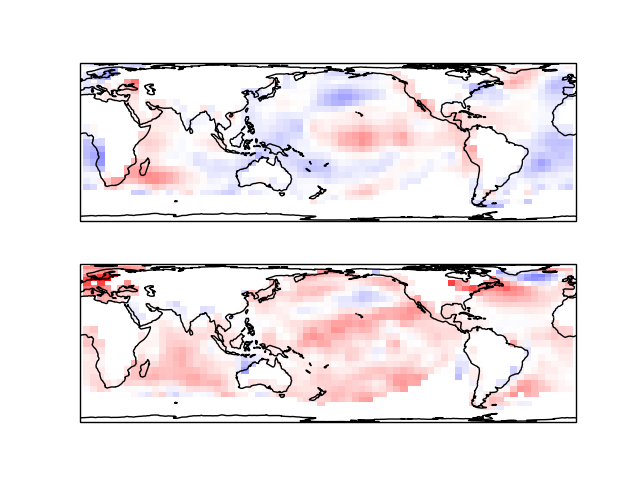

In [6]:
%matplotlib notebook
plot_proj = ccrs.LambertCylindrical(central_longitude=180)
data_proj = ccrs.PlateCarree()
fig, (ax5, ax6) = plt.subplots(nrows=2, subplot_kw={"projection":plot_proj})
ax5.coastlines()
ax6.coastlines()
ax5.pcolormesh(lons, lats, sst.isel(time=0), vmin=-vext, vmax=vext, cmap='bwr', transform=data_proj)
ax6.pcolormesh(lons, lats, sst.isel(time=-1), vmin=-vext, vmax=vext, cmap='bwr', transform=data_proj)

## Integration with xarray
xarray has its own wrapper around matplotlib that works with cartopy (but not basemap!). First I'll show what it looks like unprojected and then show how to integrate cartopy.

<IPython.core.display.Javascript object>


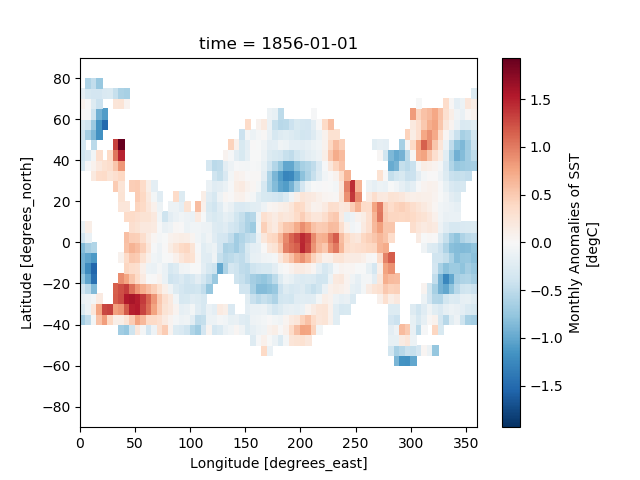

In [7]:
%matplotlib notebook
# Just xarray
sst.isel(time=0).plot()

<IPython.core.display.Javascript object>


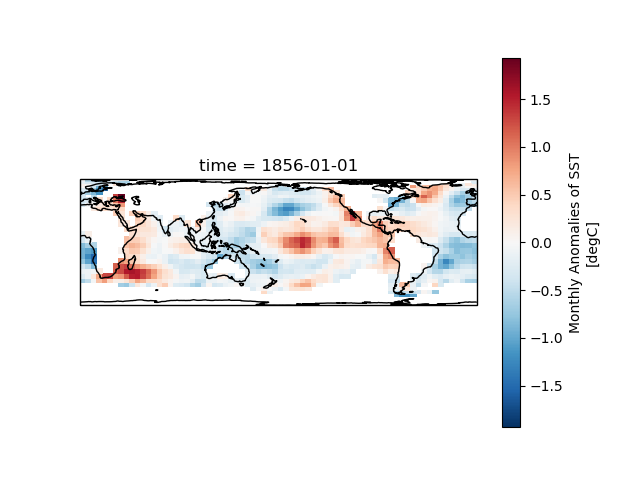

In [8]:
%matplotlib notebook
# xarray + cartopy
plot_proj = ccrs.LambertCylindrical(central_longitude=180)
data_proj = ccrs.PlateCarree()
ax7 = plt.axes(projection=plot_proj)
sst.isel(time=0).plot(ax=ax7, transform=data_proj)
ax7.coastlines()

## A more complex example of cartopy

In [9]:
# You can get this data from https://gis.utah.gov/data/water/lakes-rivers-dams/#NHDLakes
lakes = gpd.read_file('LakesNHDHighRes/LakesNHDHighRes.shp')   # gpd is geopandas (imported earlier)
lakes

,Permanent_,FDate,Resolution,GNIS_ID,GNIS_Name,AreaSqKm,Elevation,ReachCode,FType,FType_Text,FCode,FCode_Text,InUtah,IsMajor,SHAPE_Leng,SHAPE_Area,geometry
0,78889362,2003-04-04,2,None,None,0.002,0.0,14080203004851,390,Lake/Pond,39001,Lake/Pond - Intermittent,0,0,190.024347,2366.63515,"POLYGON ((685326.0499999998 4190077.09, 685319..."
1,87430413,2003-06-19,2,None,None,0.002,0.0,14030002006848,390,Lake/Pond,39004,Lake/Pond - Perennial,0,0,164.306881,1655.72165,"POLYGON ((684950.6900000004 4200377.4, 684942...."
2,87430419,2003-06-19,2,None,None,0.001,0.0,14030002006851,390,Lake/Pond,39004,Lake/Pond - Perennial,0,0,110.933044,897.05095,"POLYGON ((685981.8499999996 4200236.77, 685978..."
3,87430313,2003-06-19,2,None,None,0.000,0.0,14030002006800,390,Lake/Pond,39004,Lake/Pond - Perennial,0,0,80.557021,427.48890,"POLYGON ((685578.0599999996 4204933.460000001,..."
4,87436183,2003-06-19,2,None,None,0.001,0.0,14030002007357,390,Lake/Pond,39001,Lake/Pond - Intermittent,0,0,115.423067,901.01645,"POLYGON ((684802.96 4214034.77, 684798.7199999..."
5,87436177,2003-06-19,2,None,None,0.001,0.0,14030002007354,390,Lake/Pond,39001,Lake/Pond - Intermittent,0,0,145.039335,1192.01390,"POLYGON ((684715.46 4215176.720000001, 684700...."
6,62513795,2002-11-27,2,None,None,0.001,0.0,14030004002771,390,Lake/Pond,39001,Lake/Pond - Intermittent,0,0,93.426183,599.09215,"POLYGON ((683504.1799999997 4302351.949999999,..."
7,80064645,2003-04-14,2,None,None,0.001,0.0,14030001003724,390,Lake/Pond,39004,Lake/Pond - Perennial,0,0,113.490304,715.31970,"POLYGON ((683413.8700000001 4304448.220000001,..."
8,70009414,2003-02-11,2,None,None,0.001,0.0,14010005015708,390,Lake/Pond,39001,Lake/Pond - Intermittent,0,0,142.655909,1257.83130,"POLYGON ((682842.9199999999 4344215.970000001,..."
9,82521760,2003-04-29,2,None,None,0.001,0.0,14080202002697,390,Lake/Pond,39004,Lake/Pond - Perennial,0,0,130.796315,1180.79555,"POLYGON ((687968.9699999997 4138227.5, 687958...."


<IPython.core.display.Javascript object>


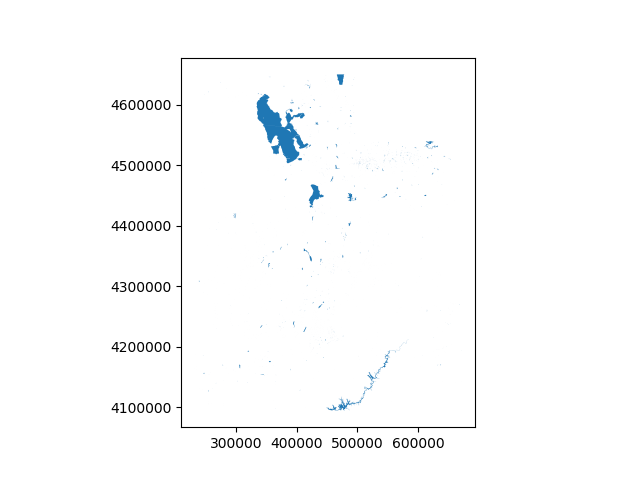

In [10]:
%matplotlib notebook
# Plot the lakes in Utah on the native UTM coordinates
lakes = lakes.where(lakes.InUtah == 1).dropna()
lakes.plot()

### Projection info (in the .prj file)
```
PROJCS["NAD_1983_UTM_Zone_12N",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137.0,298.257222101]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["False_Easting",500000.0],PARAMETER["False_Northing",0.0],PARAMETER["Central_Meridian",-111.0],PARAMETER["Scale_Factor",0.9996],PARAMETER["Latitude_Of_Origin",0.0],UNIT["Meter",1.0]]
```

In [11]:
# Create a projection describing the coordinates the lake data is in
nhd_globe = ccrs.Globe(datum='NAD83', ellipse='GRS80')
lake_proj = ccrs.UTM(zone=12, globe=nhd_globe)

<IPython.core.display.Javascript object>


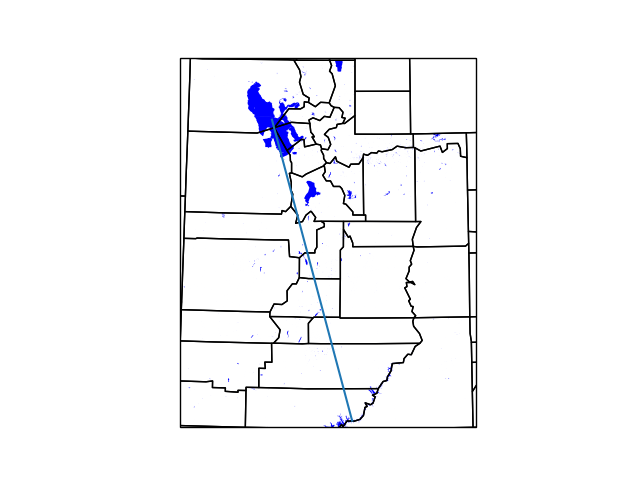

In [12]:
%matplotlib notebook
from cartopy.feature import ShapelyFeature

# Anyone who uses WRF knows this projection well. Notice how much easier it is to specify than with Basemap!
plot_proj = ccrs.LambertConformal(central_longitude=-111, central_latitude=40, standard_parallels=(36, 44), cutoff=20)
extent = (-114, -109, 37, 42)

fig, ax8 = plt.subplots(subplot_kw={"projection":plot_proj})
ax8.set_extent(extent, ccrs.Geodetic())  # Have to specify the projection (lat-lon) because it's different from plot_proj
ax8.add_feature(ShapelyFeature(lakes.geometry.values, facecolor='blue', crs=lake_proj))

In [13]:
from metpy.plots import USCOUNTIES
# Add counties
ax8.add_feature(USCOUNTIES, edgecolor='black')
plt.show()

In [14]:
import shapely.geometry as geo
# Calculate representative points of GSL and Lake Powell and draw a line between them
gsl = geo.MultiPolygon([poly for poly in lakes.where(lakes.GNIS_Name == "Great Salt Lake").dropna().geometry])
powell = geo.MultiPolygon([poly for poly in lakes.where(lakes.GNIS_Name == "Lake Powell").dropna().geometry])
gslx, gsly = gsl.representative_point().xy
powellx, powelly = powell.representative_point().xy
ax8.plot([gslx, powellx], [gsly, powelly], transform=lake_proj)